In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
n_threads = 12

In [3]:
with open(f'../../grace_is_the_best/intermediaries/output_0.txt') as in_file:
    variables = next(in_file).strip().split(',')
num_lines = -n_threads
for i in range(n_threads):
    with open(f'../../grace_is_the_best/intermediaries/output_{i}.txt') as in_file:
        num_lines += sum(1 for _ in in_file)
data_dict = {}
for var in variables:
    data_dict[var] = np.zeros(num_lines)

In [4]:
k = 0
progress_bar = tqdm(total=num_lines)
for i in range(n_threads):
    with open(f'../../grace_is_the_best/intermediaries/output_{i}.txt') as in_file:
        next(in_file)
        for line in in_file:
            for j, dat in enumerate(line.strip().split(',')):
                data_dict[variables[j]][k] = float(dat)
            k += 1
            progress_bar.update(1)

100%|██████████████████████████▉| 82290932/82296204 [05:23<00:00, 256918.87it/s]

In [ ]:
min_charge = np.floor(np.min([np.min(data_dict['charge_a_old']),np.min(data_dict['charge_b_old']),np.min(data_dict['charge_a_new']),np.min(data_dict['charge_b_new'])]))
max_charge = np.ceil(np.max([np.max(data_dict['charge_a_old']),np.max(data_dict['charge_b_old']),np.max(data_dict['charge_a_new']),np.max(data_dict['charge_b_new'])]))
min_peak = np.floor(np.min([np.min(data_dict['peak_a_old']),np.min(data_dict['peak_b_old']),np.min(data_dict['peak_a_new']),np.min(data_dict['peak_b_new'])]))
max_peak = np.ceil(np.max([np.max(data_dict['peak_a_old']),np.max(data_dict['peak_b_old']),np.max(data_dict['peak_a_new']),np.max(data_dict['peak_b_new'])]))

In [ ]:
charge_bins = np.arange(min_charge, max_charge, 0.5)
peak_bins = np.arange(min_peak, max_peak, 0.5)

In [ ]:
charge_a_old_hist, _ = np.histogram(data_dict['charge_a_old'], bins=charge_bins)
charge_b_old_hist, _ = np.histogram(data_dict['charge_b_old'], bins=charge_bins)
charge_a_new_hist, _ = np.histogram(data_dict['charge_a_new'], bins=charge_bins)
charge_b_new_hist, _ = np.histogram(data_dict['charge_b_new'], bins=charge_bins)

peak_a_old_hist, _ = np.histogram(data_dict['peak_a_old'], bins=peak_bins)
peak_b_old_hist, _ = np.histogram(data_dict['peak_b_old'], bins=peak_bins)
peak_a_new_hist, _ = np.histogram(data_dict['peak_a_new'], bins=peak_bins)
peak_b_new_hist, _ = np.histogram(data_dict['peak_b_new'], bins=peak_bins)

In [ ]:
plt.plot(peak_bins[1:], peak_a_old_hist, ds='steps-mid')
plt.plot(peak_bins[1:], peak_b_old_hist, ds='steps-mid')
plt.plot(peak_bins[1:], peak_a_new_hist, ds='steps-mid')
plt.plot(peak_bins[1:], peak_b_new_hist, ds='steps-mid')

plt.yscale('log')

In [ ]:
fixed_num_bins = 1080
num_bins = np.linspace(-1000,1000, fixed_num_bins)
bin_range = (-1000, 1000) 

counts_a_old, bins_a_old = np.histogram(data_dict['charge_a_old'], bins=fixed_num_bins)
counts_b_old, bins_b_old = np.histogram(data_dict['charge_b_old'], bins=fixed_num_bins)

counts_a_new, bins_a_new = np.histogram(data_dict['charge_a_new'], bins=fixed_num_bins)
counts_b_new, bins_b_new = np.histogram(data_dict['charge_b_new'], bins=fixed_num_bins)

def get_peak_value(counts, bins):
    non_zero_counts = counts[bins[:-1] > 0]  # Exclude the 0 bin
    non_zero_bins = bins[:-1][bins[:-1] > 0]
    peak_bin_index = np.argmax(non_zero_counts)
    return non_zero_bins[peak_bin_index]

# Get peak values
peak_bin_value_a_new = get_peak_value(counts_a_new, bins_a_new)
peak_bin_value_b_new = get_peak_value(counts_b_new, bins_b_new)
peak_bin_value_a_old = get_peak_value(counts_a_old, bins_a_old)
peak_bin_value_b_old = get_peak_value(counts_b_old, bins_b_old)

print(peak_bin_value_a_new, peak_bin_value_b_new, peak_bin_value_a_old, peak_bin_value_b_old)

# Plotting the histograms
plt.figure()
plt.hist(data_dict['charge_a_old'], histtype='step', label=f'charge_a old, peak = {peak_bin_value_a_old:.2f} pC', bins=num_bins, range=bin_range, color='cyan')
plt.hist(data_dict['charge_b_old'], histtype='step', label=f'charge_b old, peak = {peak_bin_value_b_old:.2f} pC', bins=num_bins, range=bin_range, color='magenta')
plt.hist(data_dict['charge_a_new'], histtype='step', label=f'charge_a new, peak = {peak_bin_value_a_new:.2f} pC', bins=num_bins, range=bin_range, color='orange')
plt.hist(data_dict['charge_b_new'], histtype='step', label=f'charge_b new, peak = {peak_bin_value_b_new:.2f} pC', bins=num_bins, range=bin_range, color='black')
plt.xlim(-100, 1000)
plt.xlabel('charge [pC]')
plt.ylabel('n')
plt.yscale('log')
plt.title("Charge Distribution New vs Old Algorithm")
plt.legend(prop={'size': 8})
plt.show()

In [ ]:
fixed_num_bins = 1080
num_bins = np.linspace(-200,200, fixed_num_bins)
bin_range = (-200, 200) 

counts_a_old, bins_a_old = np.histogram(data_dict['charge_a_old'], bins=fixed_num_bins)
counts_b_old, bins_b_old = np.histogram(data_dict['charge_b_old'], bins=fixed_num_bins)

counts_a_new, bins_a_new = np.histogram(data_dict['charge_a_new'], bins=fixed_num_bins)
counts_b_new, bins_b_new = np.histogram(data_dict['charge_b_new'], bins=fixed_num_bins)

exclusion_zone = 80

def get_peak_value(counts, bins):
    non_zero_counts = counts[bins[:-1] > 0]  # Exclude the 0 bin
    non_zero_bins = bins[:-1][bins[:-1] > 0]
    peak_bin_index = np.argmax(non_zero_counts)
    return non_zero_bins[peak_bin_index]

def get_secondary_peak(counts, bins, exclusion_zone = 80):
    # Get bin centers
    bins_center = (bins[:-1] + bins[1:]) / 2

    positive_bins = bins_center[bins_center > exclusion_zone]

    positive_counts = counts[bins_center > exclusion_zone]

    # Find the peak in the positive side
    peak_pos_index = np.argmax(positive_counts)
    peak_pos_value = positive_bins[peak_pos_index]

    return peak_pos_value
    
# Get peak values
peak_bin_value_a_new = get_peak_value(counts_a_new, bins_a_new)
peak_bin_value_b_new = get_peak_value(counts_b_new, bins_b_new)
peak_bin_value_a_old = get_peak_value(counts_a_old, bins_a_old)
peak_bin_value_b_old = get_peak_value(counts_b_old, bins_b_old)

print(peak_bin_value_a_new, peak_bin_value_b_new, peak_bin_value_a_old, peak_bin_value_b_old)

#Get seconday peak values
sec_peak_bin_value_a_new = get_secondary_peak(counts_a_new, bins_a_new)
sec_peak_bin_value_b_new = get_secondary_peak(counts_b_new, bins_b_new)
sec_peak_bin_value_a_old = get_secondary_peak(counts_a_old, bins_a_old)
sec_peak_bin_value_b_old = get_secondary_peak(counts_b_old, bins_b_old)

# Plotting the histograms
plt.figure()
plt.hist(data_dict['charge_a_old'], histtype='step', label=f'charge_a old, peak = {peak_bin_value_a_old:.2f} pC, {sec_peak_bin_value_a_old:.2f} pC', bins=num_bins, range=bin_range, color='cyan')
plt.hist(data_dict['charge_b_old'], histtype='step', label=f'charge_b old, peak = {peak_bin_value_b_old:.2f} pC, {sec_peak_bin_value_b_old:.2f} pC', bins=num_bins, range=bin_range, color='magenta')
plt.hist(data_dict['charge_a_new'], histtype='step', label=f'charge_a new, peak = {peak_bin_value_a_new:.2f} pC, {sec_peak_bin_value_a_new:.2f} pC', bins=num_bins, range=bin_range, color='orange')
plt.hist(data_dict['charge_b_new'], histtype='step', label=f'charge_b new, peak = {peak_bin_value_b_new:.2f} pC, {sec_peak_bin_value_b_new:.2f} pC', bins=num_bins, range=bin_range, color='black')
plt.xlim(0, 200)
plt.xlabel('charge [pC]')
plt.ylabel('n')
plt.yscale('log')
plt.title("Charge Distribution New vs Old Algorithm")
plt.legend(prop={'size': 8})
plt.show()

In [ ]:
diff_charge_a = data_dict['charge_a_old'] - data_dict['charge_a_new']
diff_charge_b = data_dict['charge_b_old'] - data_dict['charge_b_new']

In [ ]:
fixed_num_bins = 1080
num_bins = np.linspace(-1000,1000, fixed_num_bins)
bin_range = (-1000, 1000) 

plt.figure()
plt.hist(diff_charge_a, histtype = 'step', label = 'charge_a', bins=num_bins, range=bin_range)
plt.hist(diff_charge_b, histtype = 'step', label = 'charge_b', bins=num_bins, range=bin_range)
plt.xlabel('charge difference [pC]')
plt.ylabel('n')
#plt.xlim(-20, 20)
plt.title('Charge difference: new algorithm - old algorithm')
plt.legend(title = 'Run 134')
plt.yscale('log')
plt.ylim(0, 10**8)
#plt.savefig('/Users/gracetytus/Downloads/' + str(run_id) + 'charge_dist_diff_cut.png')
plt.show()

In [ ]:
fixed_num_bins = 1080
num_bins = np.linspace(-1000,1000, fixed_num_bins)
bin_range = (-1000, 1000) 

mask = (data_dict['charge_a_old'] != 0 )&(data_dict['charge_a_new'] != 0)
diff = data_dict['charge_a_old'][mask] - data_dict['charge_a_new'][mask]

plt.figure()
plt.hist(diff, histtype = 'step', label = 'charge_a', bins=num_bins, range=bin_range)
plt.xlabel('charge difference [pC]')
plt.ylabel('n')
#plt.xlim(-20, 20)
plt.title('Charge difference: new algorithm - old algorithm')
plt.legend(title = 'Run 134')
plt.yscale('log')
plt.ylim(0, 10**8)
#plt.savefig('/Users/gracetytus/Downloads/' + str(run_id) + 'charge_dist_diff_cut.png')
plt.show()

In [ ]:
counts, bins = np.histogram(diff_charge_a, bins = 1080)

exclusion_zone = 80  # Exclude bins between -1 and 1

# Get bin centers
bins_center = (bins[:-1] + bins[1:]) / 2

# Split the bins and counts into negative and positive parts, excluding the exclusion zone around 0
negative_bins = bins_center[(bins_center < -exclusion_zone)]
positive_bins = bins_center[(bins_center > exclusion_zone)]

negative_counts = counts[(bins_center < -exclusion_zone)]
positive_counts = counts[(bins_center > exclusion_zone)]
# Find the peak in the negative side
peak_neg_index = np.argmax(negative_counts)
peak_neg_value = negative_bins[peak_neg_index]

# Find the peak in the positive side
peak_pos_index = np.argmax(positive_counts)
peak_pos_value = positive_bins[peak_pos_index]

plt.figure()
plt.hist(diff_charge_a, histtype = 'step', label = 'charge_a', bins = 1000)
plt.xlabel('charge difference [pC]')
plt.ylabel('n')
plt.title('Charge a difference: new algorithm - old algorithm')
plt.yscale('log')
plt.axvline(x=peak_neg_value, color='r', linestyle='--', label=f'Peak (negative) at {peak_neg_value:.2f}')
plt.axvline(x=peak_pos_value, color='b', linestyle='--', label=f'Peak (positive) at {peak_pos_value:.2f}')
plt.xlim(-1000, 1000)
plt.ylim(0, 10**8)
plt.legend()
#plt.savefig('/Users/gracetytus/Downloads/' + str(run_id) + 'charge_a_dist.png')
plt.show()

In [ ]:
counts, bins = np.histogram(diff_charge_b, bins = 1080)

exclusion_zone = 80  # Exclude bins between -1 and 1

# Get bin centers
bins_center = (bins[:-1] + bins[1:]) / 2

# Split the bins and counts into negative and positive parts, excluding the exclusion zone around 0
negative_bins = bins_center[(bins_center < -exclusion_zone)]
positive_bins = bins_center[(bins_center > exclusion_zone)]

negative_counts = counts[(bins_center < -exclusion_zone)]
positive_counts = counts[(bins_center > exclusion_zone)]
# Find the peak in the negative side
peak_neg_index = np.argmax(negative_counts)
peak_neg_value = negative_bins[peak_neg_index]

# Find the peak in the positive side
peak_pos_index = np.argmax(positive_counts)
peak_pos_value = positive_bins[peak_pos_index]


plt.figure()
plt.hist(diff_charge_b, histtype = 'step', label = 'charge_b', bins = 1000, color = 'orange')
plt.xlabel('charge difference [pC]')
plt.ylabel('n')
plt.title('Charge b difference: new algorithm - old algorithm')
plt.yscale('log')
plt.axvline(x=peak_neg_value, color='r', linestyle='--', label=f'Peak (negative) at {peak_neg_value:.2f}')
plt.axvline(x=peak_pos_value, color='b', linestyle='--', label=f'Peak (positive) at {peak_pos_value:.2f}')
plt.legend()
plt.ylim(0, 10**8)
#plt.savefig('/Users/gracetytus/Downloads/' + str(run_id) + 'charge_b_dist.png')
plt.show()

In [ ]:
plt.plot(charge_bins[1:], charge_a_old_hist, ds='steps-mid')
plt.plot(charge_bins[1:], charge_b_old_hist, ds='steps-mid')
plt.plot(charge_bins[1:], charge_a_new_hist, ds='steps-mid')
plt.plot(charge_bins[1:], charge_b_new_hist, ds='steps-mid')

plt.yscale('log')

In [ ]:
fixed_num_bins = 1080
num_bins = np.linspace(-1000,1000, fixed_num_bins)
bin_range = (-1000, 1000) 

counts_a_old, bins_a_old = np.histogram(data_dict['peak_a_old'], bins=fixed_num_bins)
counts_b_old, bins_b_old = np.histogram(data_dict['peak_b_old'], bins=fixed_num_bins)

counts_a_new, bins_a_new = np.histogram(data_dict['peak_a_new'], bins=fixed_num_bins)
counts_b_new, bins_b_new = np.histogram(data_dict['peak_b_new'], bins=fixed_num_bins)

def get_peak_value(counts, bins):
    non_zero_counts = counts[bins[:-1] > 0]  # Exclude the 0 bin
    non_zero_bins = bins[:-1][bins[:-1] > 0]
    peak_bin_index = np.argmax(non_zero_counts)
    return non_zero_bins[peak_bin_index]

# Get peak values
peak_bin_value_a_new = get_peak_value(counts_a_new, bins_a_new)
peak_bin_value_b_new = get_peak_value(counts_b_new, bins_b_new)
peak_bin_value_a_old = get_peak_value(counts_a_old, bins_a_old)
peak_bin_value_b_old = get_peak_value(counts_b_old, bins_b_old)

print(peak_bin_value_a_new, peak_bin_value_b_new, peak_bin_value_a_old, peak_bin_value_b_old)

# Plotting the histograms
plt.figure()
plt.hist(data_dict['peak_a_old'], histtype='step', label=f'peak voltage a old', bins=num_bins, range=bin_range, color='cyan')
plt.hist(data_dict['peak_b_old'], histtype='step', label=f'peak voltage b old', bins=num_bins, range=bin_range, color='magenta')
plt.hist(data_dict['peak_a_new'], histtype='step', label=f'peak voltage a new', bins=num_bins, range=bin_range, color='orange')
plt.hist(data_dict['peak_b_new'], histtype='step', label=f'peak voltage b new', bins=num_bins, range=bin_range, color='black')
plt.xlim(0, 1000)
plt.xlabel('voltage [mV]')
plt.ylabel('n')
plt.yscale('log')
plt.title("Peak Voltage Distribution New vs Old Algorithm")
plt.legend(prop={'size': 8})
plt.show()

In [ ]:
diff_peak_a = data_dict['peak_a_new'] - data_dict['peak_a_old']
diff_peak_b = data_dict['peak_b_new'] - data_dict['peak_b_old']

In [ ]:
fixed_num_bins = 1080
num_bins = np.linspace(-1000,1000, fixed_num_bins)
bin_range = (-1000, 1000) 

plt.figure()
plt.hist(diff_peak_a, histtype = 'step', label = 'peak_a', bins=num_bins, range=bin_range)
plt.hist(diff_peak_b, histtype = 'step', label = 'peak_b', bins=num_bins, range=bin_range)
plt.xlabel('voltage difference [mV]')
plt.ylabel('n')
#plt.xlim(-20, 20)
plt.title('Voltage difference: new algorithm - old algorithm')
plt.legend(title = 'Run 134')
plt.yscale('log')
plt.ylim(0, 10**8)
#plt.savefig('/Users/gracetytus/Downloads/' + str(run_id) + 'charge_dist_diff_cut.png')
plt.show()

In [ ]:
plt.figure()

plt.hist2d(data_dict['charge_a_new'], data_dict['peak_a_new'], bins=50, cmap='viridis')

# Add a colorbar to show the intensity scale
plt.colorbar(label='Counts')

# Add labels and a title
plt.xlabel('Peak A New')
plt.ylabel('Charge A New')
plt.title('2D Histogram of Peak A vs Charge A')

# Display the plot
plt.show()

In [12]:
mask_a_new = data_dict['charge_a_new'] != 0
valid_peak_a_new = data_dict['peak_a_new'][mask_a_new]
valid_charge_a_new = data_dict['charge_a_new'][mask_a_new]

quotient_a_new = valid_peak_a_new / valid_charge_a_new

In [50]:
mask_a_old = data_dict['charge_a_old'] != 0
valid_peak_a_old = data_dict['peak_a_old'][mask_a_old]
valid_charge_a_old = data_dict['charge_a_old'][mask_a_old]

quotient_a_old = valid_peak_a_old / valid_charge_a_old

In [9]:
n = 0
for a in quotient_a_new:
    if a == 0:
        n += 1
print(n)

2007793


In [10]:
print(len(quotient_a_new))

82296204


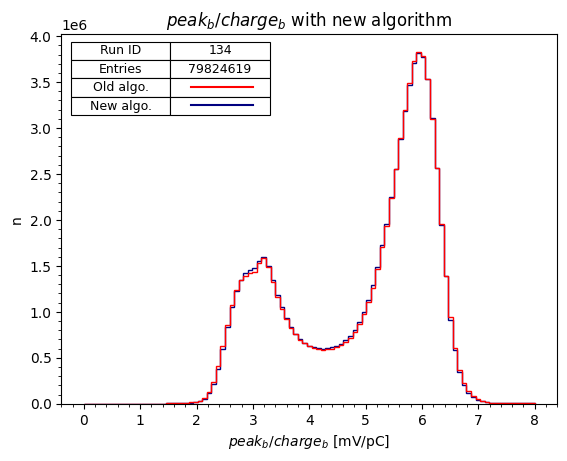

In [81]:
fixed_num_bins = 100
num_bins = np.linspace(0,8, fixed_num_bins)
bin_range = (0, 8) 

num_entries = len(quotient_b_new)

fig, ax = plt.subplots()
ax.hist(quotient_b_new, histtype = 'step', label = 'peak_b', bins=num_bins, range=bin_range, color = 'navy')
ax.hist(quotient_b_old, histtype = 'step', label = 'peak_b', bins=num_bins, range=bin_range, color = 'red')

ax.minorticks_on()
ax.set_title(r'$peak_b / charge_b$ with new algorithm')
ax.set_xlabel('$peak_b / charge_b$ [mV/pC]')
ax.set_ylabel('n')

table_data = [['Run ID', str(134)], ['Entries', num_entries], ['Old algo.', ''], ['New algo.', '']]

# Create the table at the desired position
table = ax.table(cellText=table_data,
                 cellLoc='center',
                 loc='upper left')  # Position table like a legend

# Set table appearance
table.set_fontsize(9)
table.scale(0.6, 0.8)  # Adjust scaling of the table (optional)

# Get the number of rows and columns in the table
num_rows, num_cols = len(table_data), len(table_data[0])

# Loop through the cells in the table
for (row, col), cell in table.get_celld().items():
    # Skip header and out-of-bounds cells
    if row == -1 or col == -1:
        continue

    # Set text alignment to reduce white space
    cell.set_text_props(horizontalalignment='center', verticalalignment='center')

    # Adjust the width and height of the cells to reduce padding
    cell.set_height(0.05)  # Reduce height if needed
    cell.set_width(0.2)   # Adjust width (could reduce this as well)

    # If the cell is in the outer boundary, set the line width to 1.0 (outer box)
    if row == 0 or row == num_rows - 1 or col == 0 or col == num_cols - 1:
        cell.set_linewidth(0.8)  # Outer box line width
    else:
        cell.set_linewidth(0)    # Remove inner lines

# This will draw a red line inside the cell at row 2, column 1
if (2, 1) in table.get_celld():
    # Access the cell and draw a line within it
    cell = table[(2, 1)]
    # Get the position of the cell
    x0, y0 = 1.9, 3450000  # Adjust these values as needed (relative coordinates)
    x1, y1 = 3.0, 3450000  # The length and position of the line
# Draw the line directly in the desired location
ax.plot([x0, x1], [y0, y1], color='red', lw=1.5)

if (3, 1) in table.get_celld():
    # Access the cell and draw a line within it
    cell = table[(2, 1)]
    # Get the position of the cell
    x0, y0 = 1.9, 3250000  # Adjust these values as needed (relative coordinates)
    x1, y1 = 3.0, 3250000  # The length and position of the line

# Draw the line directly in the desired location
ax.plot([x0, x1], [y0, y1], color='navy', lw=1.5)
plt.savefig('/Users/gracetytus/Downloads/run134_pb_cb_ratio.png')
plt.show()

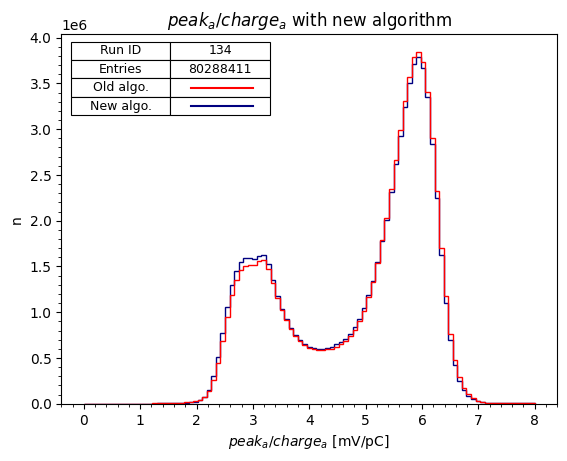

In [82]:
fixed_num_bins = 100
num_bins = np.linspace(0,8, fixed_num_bins)
bin_range = (0, 8) 

num_entries = len(quotient_a_new)

fig, ax = plt.subplots()
ax.hist(quotient_a_new, histtype = 'step', label = 'peak_a', bins=num_bins, range=bin_range, color = 'navy')
ax.hist(quotient_a_old, histtype = 'step', label = 'peak_a', bins=num_bins, range=bin_range, color = 'red')

ax.minorticks_on()
ax.set_title(r'$peak_a / charge_a$ with new algorithm')
ax.set_xlabel('$peak_a / charge_a$ [mV/pC]')
ax.set_ylabel('n')

table_data = [['Run ID', str(134)], ['Entries', num_entries], ['Old algo.', ''], ['New algo.', '']]

# Create the table at the desired position
table = ax.table(cellText=table_data,
                 cellLoc='center',
                 loc='upper left')  # Position table like a legend

# Set table appearance
table.set_fontsize(9)
table.scale(0.6, 0.8)  # Adjust scaling of the table (optional)

# Get the number of rows and columns in the table
num_rows, num_cols = len(table_data), len(table_data[0])

# Loop through the cells in the table
for (row, col), cell in table.get_celld().items():
    # Skip header and out-of-bounds cells
    if row == -1 or col == -1:
        continue

    # Set text alignment to reduce white space
    cell.set_text_props(horizontalalignment='center', verticalalignment='center')

    # Adjust the width and height of the cells to reduce padding
    cell.set_height(0.05)  # Reduce height if needed
    cell.set_width(0.2)   # Adjust width (could reduce this as well)

    # If the cell is in the outer boundary, set the line width to 1.0 (outer box)
    if row == 0 or row == num_rows - 1 or col == 0 or col == num_cols - 1:
        cell.set_linewidth(0.8)  # Outer box line width
    else:
        cell.set_linewidth(0)    # Remove inner lines

# This will draw a red line inside the cell at row 2, column 1
if (2, 1) in table.get_celld():
    # Access the cell and draw a line within it
    cell = table[(2, 1)]
    # Get the position of the cell
    x0, y0 = 1.9, 3450000  # Adjust these values as needed (relative coordinates)
    x1, y1 = 3.0, 3450000  # The length and position of the line
# Draw the line directly in the desired location
ax.plot([x0, x1], [y0, y1], color='red', lw=1.5)

if (3, 1) in table.get_celld():
    # Access the cell and draw a line within it
    cell = table[(2, 1)]
    # Get the position of the cell
    x0, y0 = 1.9, 3250000  # Adjust these values as needed (relative coordinates)
    x1, y1 = 3.0, 3250000  # The length and position of the line

# Draw the line directly in the desired location
ax.plot([x0, x1], [y0, y1], color='navy', lw=1.5)
plt.savefig('/Users/gracetytus/Downloads/run134_pa_ca_ratio.png')
plt.show()

In [77]:
mask_b_new = data_dict['charge_b_new'] != 0
valid_peak_b_new = data_dict['peak_b_new'][mask_b_new]
valid_charge_b_new = data_dict['charge_b_new'][mask_b_new]

quotient_b_new = valid_peak_b_new / valid_charge_b_new

mask_b_old = data_dict['charge_b_old'] != 0
valid_peak_b_old = data_dict['peak_b_old'][mask_b_old]
valid_charge_b_old = data_dict['charge_b_old'][mask_b_old]

quotient_b_old = valid_peak_b_old / valid_charge_b_old